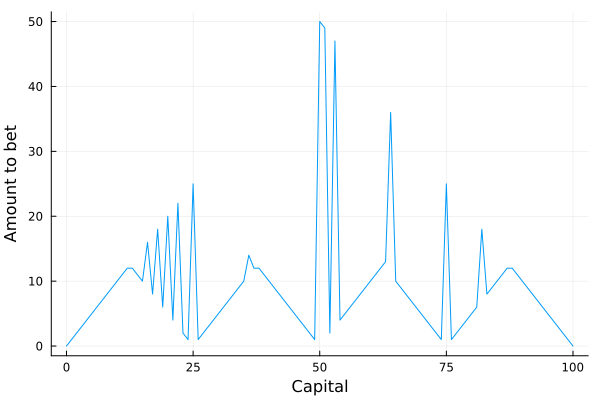

In [2]:
S = collect(0:100)  # states 0 and 100 are terminal

# value iteration for the gambler's problem.
# V is the value function
# π is the policy
# ph is the probability of heads
function value_iteration(V, policy, ph)
    γ = 1.0    # discount factor
    θ = 1e-6   # tolerance for convergence

    while true 
        Δ = 0
        for s in 1:99
            v = V[s+1]
            A = 1:min(s, 100 - s)
            q = zeros(length(A))
            for a in A
                q[a] = ph * (γ*V[s+1+a]) + (1 - ph)*(γ*V[s+1-a])
            end

            V[s + 1] = maximum(q)
            policy[s + 1] = argmax(q)
            Δ = max(Δ, abs(v-V[s+1]))
        end
        if Δ < θ
            break
        end
    end

        
    return V, policy
    # output the optimal value function and a deterministic policy
end

policy = zeros(length(S))
V = zeros(length(S))  # will hold the value function
# note that zero is a (terminal) state, so if the state is s, then
# the index into V is s+1
V[101] = 1
V, policy = value_iteration(V, policy, 0.4)

using Plots

plot(S, policy, xlabel="Capital", ylabel="Amount to bet", label="")




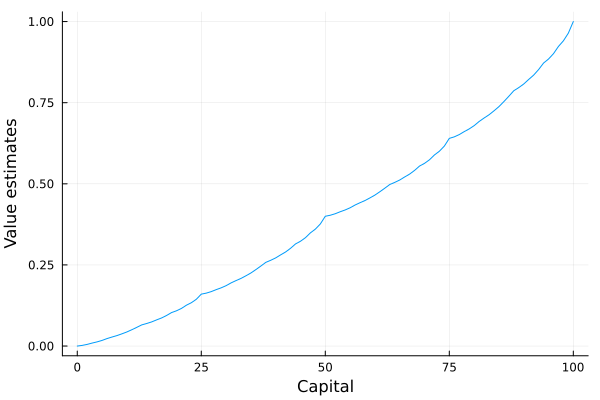

In [3]:
plot(S, V, xlabel="Capital", ylabel="Value estimates", label="") 

Following the pseudocode given in class, the while loop iteratoes πuntil delta is smaller than the tolerance, which is 1e-6. It continuely updates V and π (which I had to call policy,as it was giving me errors). Inside the while loop is a for loop that iterates from 1:99, which is where the updates to V and π actually happen. 